<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_2/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Прямое дискретное преобразование Фурье. Спектр сигнала. Теорема Котельникова. Муаровый эффект и алиасинг.</h1>

<h3>Введем необходимые библиотеки для отображения и построения функции</h3>

In [18]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

<h3>Напишем функцию сигнала, принимающую на вход f*t(частоту на время) с частотами 1, 2 и 3</h3>

In [19]:
def signal(x):
  return 1 + np.sin(2.0*pi*x) + 2 * np.cos(4.0*pi*x) + 0.5 * np.cos(6.0*pi*x)

<h3>Напишем функцию дискретного преобразования Фурье, принимающую на вход сформированный сигнал</h3>

In [40]:
def dft(data):
  n = len(data)
  spectr = [0+0j] * n
  coef = 2 / n
  arg = pi * coef
  for j in range(n):
    spectr[j] = 0 + 0.0j
    for i in range(n):
      spectr[j] += data[i] * (cos(arg*i*j) - sin(arg*i*j)*1j)
  return np.array(spectr, dtype=complex)

<h2>Для случая, когда теорема котельникова выполняется(частота дискретизации в два раза превышает максимальную частоту в спектре)</h2>
<h3>Входные данные:<h3>
<h5>Опорная частота: 1<br>Временной интервал: 5<br>Число временных отсчетов: 50</h5>

In [21]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))
print(f'\nПериод дискретизации: {T/n} сек\nЧастота дискретизации: {n/T} Гц')
print(f'Максимальная частота в спектре сигнала: {3*f} Гц')
print(f'Минимальный периоддискретизации: {1/6/f} сек.\n')
print()
if n/T >= 2*3*f:
  print("Условие f дискрет. в два раза больше чем f макс. в спектре выполняется:")
  print(f'{n/T} >= {2*3*f}')
else:
  print("Условие f дискрет. в два раза больше чем f макс. в спектре не выполняется:")
  print(f'{n/T} < {2*3*f}')

Опорная частота сигнала 1
Временной интервал 5
Число временных отсчетов 50

Период дискретизации: 0.1 сек
Частота дискретизации: 10.0 Гц
Максимальная частота в спектре сигнала: 3.0 Гц
Минимальный периоддискретизации: 0.16666666666666666 сек.


Условие f дискрет. в два раза больше чем f макс. в спектре выполняется:
10.0 >= 6.0


<h3>Построим сигнал по введенным данным и рассчитаем ДПФ</h3>

In [46]:
t = np.linspace(0, T, n)
u = signal(f*t)
spec = dft(u)
freq = np.linspace(0, n/T, n)

<h3>Построим график U(t)</h3>

Text(0, 0.5, '$U(t)$, В')

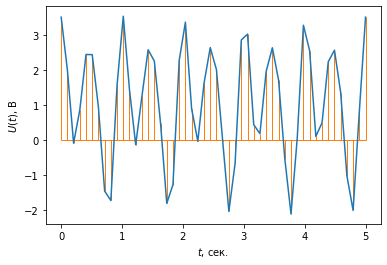

In [35]:
fig, ax = plt.subplots()
ax.plot(t, u)
ax.vlines(t, 0, u, color='tab:orange', lw=1)
ax.hlines(0, 0, t[n-1], color='tab:orange', lw=1)
ax.set_xlabel("$t$, сек.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)

<h3>Построим график U(f)</h3>

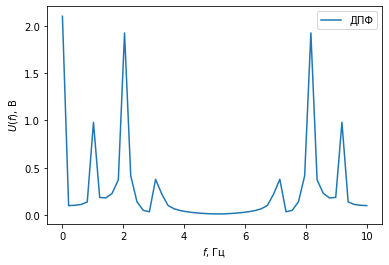

In [42]:
fig, ax = plt.subplots()
ax.plot(freq, (np.hypot(spec.real, spec.imag)/n*2.0), color='tab:blue', label='ДПФ')
ax.set_xlabel("$f$, Гц", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.legend(loc='best')

<h3>Построим график ф(t)</h3>

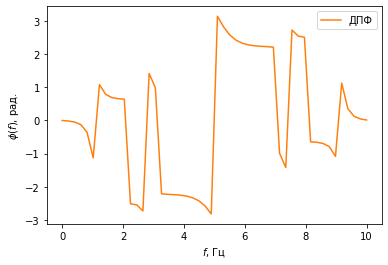

In [43]:
fig, ax = plt.subplots()
ax.plot(freq, (np.arctan2(spec.imag, spec.real)), color='tab:orange', label='ДПФ')
ax.set_xlabel("$f$, Гц", fontsize=10)
ax.set_ylabel("$\phi(f)$, рад.", fontsize=10)
ax.legend(loc='best')

<h2>Для случая, когда теорема котельникова не выполняется(частота дискретизации не превышает максимальную частоту в два раза)</h2>
<h3>Входные данные:<h3>
<h5>Опорная частота: 100<br>Временной интервал: 10<br>Число временных отсчетов: 100</h5>

In [44]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))
print(f'\nПериод дискретизации: {T/n} сек\nЧастота дискретизации: {n/T} Гц')
print(f'Максимальная частота в спектре сигнала: {3*f} Гц')
print(f'Минимальный периоддискретизации: {1/6/f} сек.\n')
print()
if n/T >= 2*3*f:
  print("Условие f дискрет. в два раза больше чем f макс. в спектре выполняется:")
  print(f'{n/T} >= {2*3*f}')
else:
  print("Условие f дискрет. в два раза больше чем f макс. в спектре не выполняется:")
  print(f'{n/T} < {2*3*f}')

Опорная частота сигнала 100
Временной интервал 10
Число временных отсчетов 100

Период дискретизации: 0.1 сек
Частота дискретизации: 10.0 Гц
Максимальная частота в спектре сигнала: 300.0 Гц
Минимальный периоддискретизации: 0.0016666666666666666 сек.


Условие f дискрет. в два раза больше чем f макс. в спектре не выполняется:
10.0 < 600.0


<h3>Построим сигнал по введенным данным и рассчитаем ДПФ</h3>

In [47]:
t = np.linspace(0, T, n)
u = signal(f*t)
spec = dft(u)
freq = np.linspace(0, n/T, n)

<h3>Построим график U(t)</h3>

Text(0, 0.5, '$U(t)$, В')

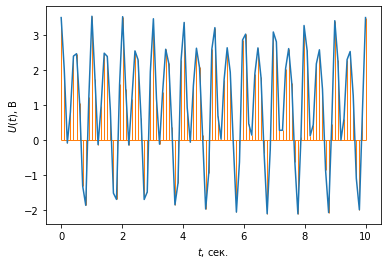

In [48]:
fig, ax = plt.subplots()
ax.plot(t, u)
ax.vlines(t, 0, u, color='tab:orange', lw=1)
ax.hlines(0, 0, t[n-1], color='tab:orange', lw=1)
ax.set_xlabel("$t$, сек.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)

<h3>Построим график U(f)</h3>

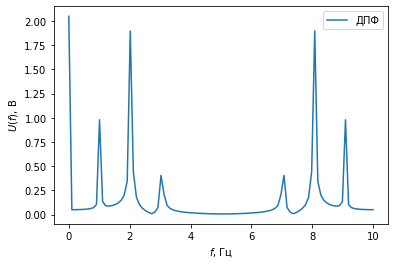

In [49]:
fig, ax = plt.subplots()
ax.plot(freq, (np.hypot(spec.real, spec.imag)/n*2.0), color='tab:blue', label='ДПФ')
ax.set_xlabel("$f$, Гц", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.legend(loc='best')

<h3>Построим график ф(t)</h3>

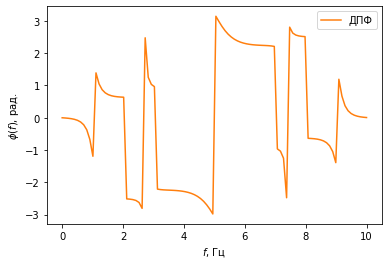

In [50]:
fig, ax = plt.subplots()
ax.plot(freq, (np.arctan2(spec.imag, spec.real)), color='tab:orange', label='ДПФ')
ax.set_xlabel("$f$, Гц", fontsize=10)
ax.set_ylabel("$\phi(f)$, рад.", fontsize=10)
ax.legend(loc='best')